<a href="https://colab.research.google.com/github/MYElmasry/Hand-Gesture-Recognition/blob/main/Hand_Gestures_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Libraries**

In [1]:
from matplotlib import pyplot
from matplotlib.image import imread
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
from matplotlib import image as mpimg
from PIL import ImageFile

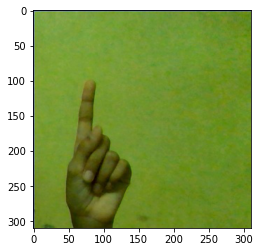

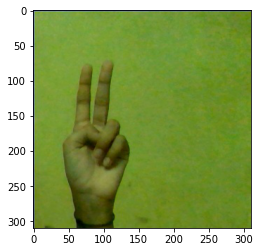

In [4]:
# plot photos
# define location of dataset
folder = '/content/drive/MyDrive/Hand_Dataset_cnn/train/'
for i in range(1,3):
  filename = folder + str(i) +'/'+ str(1000) + '.jpg'
  image = imread(filename)
  pyplot.imshow(image)
  pyplot.show()

In [5]:
# define cnn model
def define_model():
    model = Sequential()
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)    
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def run_test_harness():
    # from PIL import ImageFile
    # ImageFile.LOAD_TRUNCATED_IMAGES = True
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/Hand_Dataset_cnn/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/Hand_Dataset_cnn/validation/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('Accuracy => %.3f' % (acc * 100.0))
    
    
# entry point, run the test harness
run_test_harness()

58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 1765 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


<ipython-input-6-556785084300>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/10
28/28 [==============================] - 758s 27s/step - loss: 1.1926 - accuracy: 0.6697 - val_loss: 0.4467 - val_accuracy: 0.8009
Epoch 2/10
28/28 [==============================] - 736s 26s/step - loss: 0.2615 - accuracy: 0.8963 - val_loss: 0.2617 - val_accuracy: 0.8914
Epoch 3/10
28/28 [==============================] - 733s 26s/step - loss: 0.0711 - accuracy: 0.9853 - val_loss: 0.1797 - val_accuracy: 0.9276
Epoch 4/10
28/28 [==============================] - 728s 26s/step - loss: 0.0274 - accuracy: 0.9966 - val_loss: 0.1844 - val_accuracy: 0.9367
Epoch 5/10
28/28 [==============================] - 790s 28s/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 0.1502 - val_accuracy: 0.9412
Epoch 6/10
28/28 [==============================] - 734s 26s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9412
Epoch 7/10
28/28 [==============================] - 735s 26s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 0.9457
Epoch 

<ipython-input-6-556785084300>:18: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


4/4 [==============================] - 81s 19s/step - loss: 0.1500 - accuracy: 0.9412
Accuracy => 94.118


In [7]:
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    # ImageFile.LOAD_TRUNCATED_IMAGES = True
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/Hand_Dataset_cnn/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
    # save model
    model.save('Hand_Gestures_Recognition_final_model.h5')
# entry point, run the test harness
run_test_harness()

Found 1765 images belonging to 2 classes.


<ipython-input-7-4c5c0e76ee5a>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)


Epoch 1/10
28/28 [==============================] - 649s 23s/step - loss: 2.0999 - accuracy: 0.5819
Epoch 2/10
28/28 [==============================] - 645s 23s/step - loss: 0.3866 - accuracy: 0.8278
Epoch 3/10
28/28 [==============================] - 646s 23s/step - loss: 0.1295 - accuracy: 0.9547
Epoch 4/10
28/28 [==============================] - 644s 23s/step - loss: 0.0358 - accuracy: 0.9921
Epoch 5/10
28/28 [==============================] - 646s 23s/step - loss: 0.0143 - accuracy: 0.9989
Epoch 6/10
28/28 [==============================] - 646s 23s/step - loss: 0.0072 - accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 650s 23s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 8/10
28/28 [==============================] - 648s 23s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/10
28/28 [==============================] - 644s 23s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/10
28/28 [==============================] - 642s 23s/step - loss: 0.0024 - accuracy: 1.0000

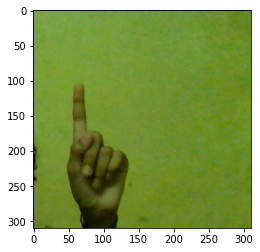

1


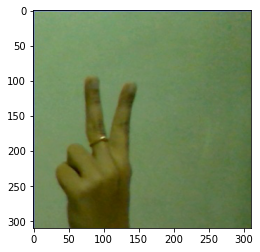

2


In [26]:
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    for i in range(1,3):
      name = str(i) + ".jpg"
      img = load_image('/content/drive/MyDrive/'+name)
      # load model
      model = load_model('/content/drive/MyDrive/Hand_Gestures_Recognition_final_model.h5')
      # predict the class
      result = model.predict(img, verbose="0")
      image = imread('/content/drive/MyDrive/'+name)
      pyplot.imshow(image)
      pyplot.show()
      if round(result[0][0]) == 0:
          print("1")
      else:
          print("2")
# entry point, run the example
run_example()